In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [83]:
data = pd.read_csv('data/Obesity_level_prediction_dataset.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


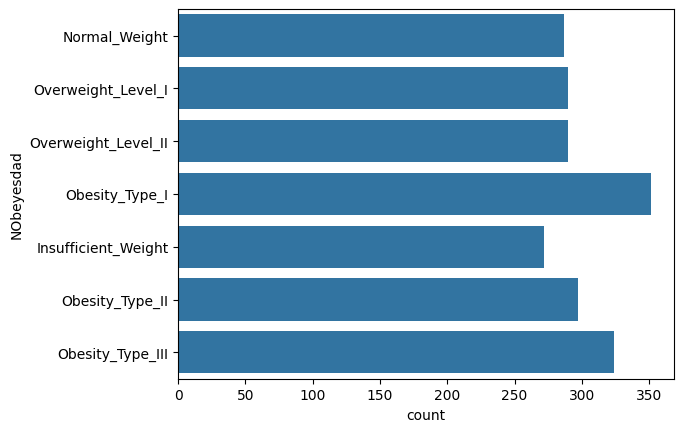

In [84]:
sns.countplot(y='NObeyesdad', data=data)
plt.show()

In [85]:
print(data.isnull().sum())
print(data.info())
print(data.describe())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height             

In [86]:
continuous_columns = data.select_dtypes(include=['float64']).columns.tolist()
print(continuous_columns)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[continuous_columns])


scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))

scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [87]:
categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('NObeyesdad')
print(categorical_columns)

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(scaled_data[categorical_columns])
print(encoder.get_feature_names_out(categorical_columns))

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
['Gender_Male' 'family_history_with_overweight_yes' 'FAVC_yes'
 'CAEC_Frequently' 'CAEC_Sometimes' 'CAEC_no' 'SMOKE_yes' 'SCC_yes'
 'CALC_Frequently' 'CALC_Sometimes' 'CALC_no' 'MTRANS_Bike'
 'MTRANS_Motorbike' 'MTRANS_Public_Transportation' 'MTRANS_Walking']


In [88]:
prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes
prepped_data.head()

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [89]:
x = prepped_data.drop('NObeyesdad', axis=1)
y = prepped_data['NObeyesdad']

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [91]:
# Logistic Regression
# One vs All
model_ova = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ova.fit(x_train, y_train)

y_pred_ova = model_ova.predict(x_test)

print(f'Accuracy: {np.round(100 * accuracy_score(y_test, y_pred_ova), 2)}%')

Accuracy: 76.12%


In [92]:
# One vs One
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(x_train, y_train)

y_pred_ovo = model_ovo.predict(x_test)

print(f'Accuracy: {np.round(100 * accuracy_score(y_test, y_pred_ovo), 2)}%')

Accuracy: 92.2%


[[-5.32857309e-01  2.13242083e+00 -8.16366657e+00  3.22105759e-01
   1.06603962e-01  2.07378505e-01 -8.27843283e-02  1.31655111e-01
  -5.13388645e-01 -1.68411932e-01 -2.91422788e-01  1.19845514e+00
   7.14810701e-01  3.48022195e-01 -7.47751970e-01 -2.69459556e-01
  -4.18174717e-01  2.21184193e-01  1.98027526e-01 -7.46571358e-01
  -2.30398838e-01  1.15351158e-01 -5.07643251e-01]
 [-1.97205885e-01 -6.81339397e-02 -1.56892303e+00 -1.66285548e-01
  -4.75945995e-03 -2.57154384e-01  2.32062429e-01 -1.76495906e-01
   9.40909158e-01 -1.93080610e-01 -9.53641704e-02 -1.05851846e+00
  -1.68704478e+00 -1.48981893e+00  1.04049237e+00  1.60822585e-01
   5.99543270e-01 -5.71662478e-01 -4.98339252e-01  1.08992371e+00
   1.06417514e+00 -3.04338622e-01  1.42240239e+00]
 [-1.81982262e-01 -7.63411764e-01  8.55631704e-01 -7.98272876e-01
  -3.46389899e-01  3.06530469e-01  1.80997559e-01 -3.50918386e-04
   2.14902230e-01  1.70169699e+00  1.84243625e+00 -7.41217955e-01
   5.33345857e-01 -8.31562514e-01  5.151

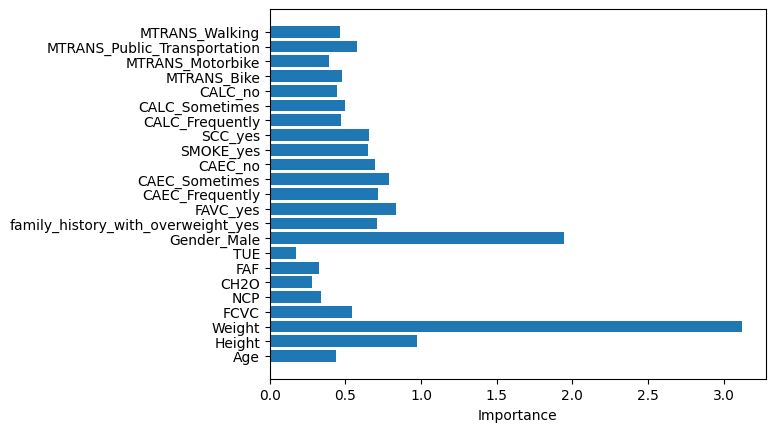

In [93]:
feature_importance = np.mean(np.abs(model_ova.coef_), axis=0)
print(model_ova.coef_)
plt.barh(x.columns, feature_importance)
plt.xlabel('Importance')
plt.show()